In [54]:
library(FactoMineR)
library("factoextra")
library(cluster)
library(devtools)
library(JLutils)

Warning message:
"package 'JLutils' was built under R version 3.6.2"
Loading required package: plyr

Warning message:
"package 'plyr' was built under R version 3.6.2"
Loading required package: magrittr

Warning message:
"package 'magrittr' was built under R version 3.6.2"


# AFC

In [26]:
music=read.csv2("../../Data/music_dataframe_TFIDF.csv",sep=',',header=T)
music = as.data.frame(music)

index = music$id
music=music[-1]

music.numeric <- data.frame(sapply(music, function(x) as.numeric(as.character(x))))
music.numeric = as.data.frame(music.numeric)
rownames(music.numeric) = index

In [27]:
music.afc = CA(music.numeric,ncp=50,graph=FALSE)

Warning message in CA(music.numeric, ncp = 50, graph = FALSE):
"The rows 296, 427, 689, 772, 974, 975, 1004, 1085, 1163, 1164, 1174, 1178, 1218, 1461, 1534, 1647, 1816, 2222, 2293, 2297, 2311, 2326, 2411, 2420, 2427, 2432, 2451, 2465 sum at 0. They were suppressed from the analysis"


In [28]:
attributes(music.afc)

$names
[1] "eig"  "call" "row"  "col"  "svd" 

$class
[1] "CA"   "list"

### Valeurs Propres, inertie expliquée

In [29]:
music.afc$eig

eigenvalue   percentage of variance cumulative percentage of variance
dim 1   0.8720250    0.7040063               0.7040063                       
dim 2   0.7879288    0.6361135               1.3401198                       
dim 3   0.7775106    0.6277027               1.9678225                       
dim 4   0.7499959    0.6054894               2.5733118                       
dim 5   0.7114958    0.5744074               3.1477192                       
dim 6   0.7056187    0.5696626               3.7173818                       
dim 7   0.6988146    0.5641695               4.2815513                       
dim 8   0.6950286    0.5611130               4.8426643                       
dim 9   0.6869975    0.5546293               5.3972936                       
dim 10  0.6719512    0.5424821               5.9397757                       
dim 11  0.6670690    0.5385406               6.4783163                       
dim 12  0.6579745    0.5311983               7.0095146                       
dim 13  0.6503821    0.5250688               7.5345834                       
dim 14  0.6402348    0.5168766               8.0514601                       
dim 15  0.6244050    0.5040969               8.5555569                       
dim 16  0.6216114    0.5018415               9.0573985                       
dim 17  0.6117470    0.4938778               9.5512763                       
dim 18  0.6081368    0.4909632              10.0422395                       
dim 19  0.6074970    0.4904467              10.5326862                       
dim 20  0.5939590    0.4795171              11.0122033                       
dim 21  0.5913867    0.4774404              11.4896437                       
dim 22  0.5885963    0.4751877              11.9648314                       
dim 23  0.5855936    0.4727635              12.4375949                       
dim 24  0.5837530    0.4712776              12.9088725                       
dim 25  0.5784771    0.4670182              13.3758907                       
dim 26  0.5761274    0.4651213              13.8410120                       
dim 27  0.5709223    0.4609191              14.3019310                       
dim 28  0.5652242    0.4563188              14.7582498                       
dim 29  0.5638368    0.4551988              15.2134486                       
dim 30  0.5609755    0.4528887              15.6663373                       
...     ...          ...                    ...                              
dim 420 5.881205e-02 4.748036e-02            99.27701                        
dim 421 5.756128e-02 4.647058e-02            99.32348                        
dim 422 5.688024e-02 4.592076e-02            99.36941                        
dim 423 5.552678e-02 4.482808e-02            99.41423                        
dim 424 5.327678e-02 4.301160e-02            99.45725                        
dim 425 5.267682e-02 4.252724e-02            99.49977                        
dim 426 5.116177e-02 4.130411e-02            99.54108                        
dim 427 4.990718e-02 4.029125e-02            99.58137                        
dim 428 4.824204e-02 3.894694e-02            99.62031                        
dim 429 4.599644e-02 3.713401e-02            99.65745                        
dim 430 4.438219e-02 3.583079e-02            99.69328                        
dim 431 4.141035e-02 3.343155e-02            99.72671                        
dim 432 4.039108e-02 3.260867e-02            99.75932                        
dim 433 3.914288e-02 3.160097e-02            99.79092                        
dim 434 3.692411e-02 2.980971e-02            99.82073                        
dim 435 3.602966e-02 2.908760e-02            99.84982                        
dim 436 3.487304e-02 2.815383e-02            99.87797                        
dim 437 3.350585e-02 2.705006e-02            99.90502                        
dim 438 3.177399e-02 2.565189e-02            99.93067                        
dim 439 2.934223e-02 2.368867e

png 
  2

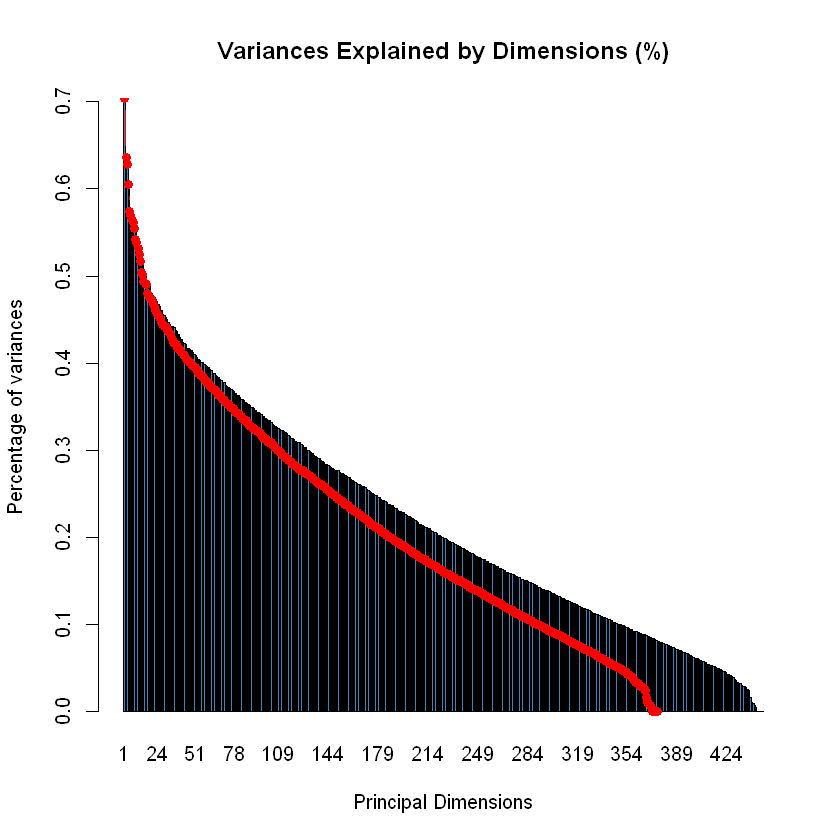

In [30]:
eig.val <- music.afc$eig
barplot(eig.val[, 2], 
        names.arg = 1:nrow(eig.val), 
        main = "Variances Explained by Dimensions (%)",
        xlab = "Principal Dimensions",
        ylab = "Percentage of variances",
        col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.val), eig.val[, 2], 
      type = "b", pch = 19, col = "red")

dev.print(device=png, file = "../../Data/valeurs_propres.png",width=600)

png 
  2

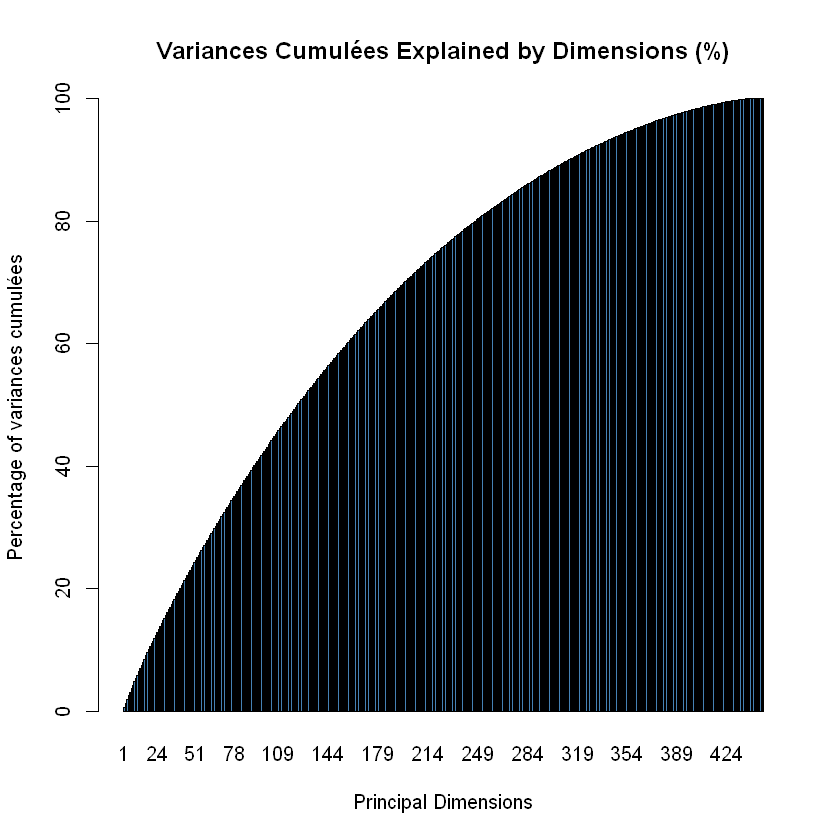

In [31]:
barplot(eig.val[, 3], 
        names.arg = 1:nrow(eig.val), 
        main = "Variances Cumulées Explained by Dimensions (%)",
        xlab = "Principal Dimensions",
        ylab = "Percentage of variances cumulées",
        col ="steelblue")

dev.print(device=png, file = "../../Data/variance_cummulee.png",width=600)

In [32]:
eig.val[, 3]
#eig.cumule <- eig.val[, 3]
#eig.cumule

dim 1       dim 2       dim 3       dim 4       dim 5       dim 6 
  0.7040063   1.3401198   1.9678225   2.5733118   3.1477192   3.7173818 
      dim 7       dim 8       dim 9      dim 10      dim 11      dim 12 
  4.2815513   4.8426643   5.3972936   5.9397757   6.4783163   7.0095146 
     dim 13      dim 14      dim 15      dim 16      dim 17      dim 18 
  7.5345834   8.0514601   8.5555569   9.0573985   9.5512763  10.0422395 
     dim 19      dim 20      dim 21      dim 22      dim 23      dim 24 
 10.5326862  11.0122033  11.4896437  11.9648314  12.4375949  12.9088725 
     dim 25      dim 26      dim 27      dim 28      dim 29      dim 30 
 13.3758907  13.8410120  14.3019310  14.7582498  15.2134486  15.6663373 
     dim 31      dim 32      dim 33      dim 34      dim 35      dim 36 
 16.1165586  16.5637664  17.0079699  17.4501810  17.8920204  18.3329345 
     dim 37      dim 38      dim 39      dim 40      dim 41      dim 42 
 18.7707588  19.2066819  19.6390113  20.0685665  20.4954004  20.9187475 
     dim 43      dim 44      dim 45      dim 46      dim 47      dim 48 
 21.3408489  21.7622590  22.1794876  22.5958941  23.0111577  23.4251715 
     dim 49      dim 50      dim 51      dim 52      dim 53      dim 54 
 23.8373270  24.2474948  24.6557909  25.0617470  25.4653923  25.8687959 
     dim 55      dim 56      dim 57      dim 58      dim 59      dim 60 
 26.2698934  26.6706743  27.0695343  27.4671363  27.8630842  28.2584100 
     dim 61      dim 62      dim 63      dim 64      dim 65      dim 66 
 28.6514308  29.0427630  29.4313338  29.8195834  30.2057441  30.5902261 
     dim 67      dim 68      dim 69      dim 70      dim 71      dim 72 
 30.9732862  31.3539227  31.7339825  32.1116947  32.4889126  32.8636337 
     dim 73      dim 74      dim 75      dim 76      dim 77      dim 78 
 33.2366083  33.6080787  33.9790631  34.3489233  34.7171884  35.0841597 
     dim 79      dim 80      dim 81      dim 82      dim 83      dim 84 
 35.4495308  35.8122426  36.1746058  36.5348972  36.8935848  37.2521928 
     dim 85      dim 86      dim 87      dim 88      dim 89      dim 90 
 37.6090582  37.9644229  38.3178475  38.6701169  39.0212710  39.3704615 
     dim 91      dim 92      dim 93      dim 94      dim 95      dim 96 
 39.7192853  40.0676043  40.4127464  40.7562439  41.0989943  41.4408120 
     dim 97      dim 98      dim 99     dim 100     dim 101     dim 102 
 41.7819409  42.1210163  42.4595548  42.7960505  43.1311001  43.4654648 
    dim 103     dim 104     dim 105     dim 106     dim 107     dim 108 
 43.7993856  44.1314796  44.4610759  44.7890810  45.1164414  45.4430158 
    dim 109     dim 110     dim 111     dim 112     dim 113     dim 114 
 45.7675404  46.0910177  46.4138899  46.7359744  47.0571098  47.3776044 
    dim 115     dim 116     dim 117     dim 118     dim 119     dim 120 
 47.6966565  48.0134035  48.3296703  48.6435618  48.9568742  49.2691093 
    dim 121     dim 122     dim 123     dim 124     dim 125     dim 126 
 49.5792781  49.8884714  50.1971337  50.5055177  50.8125221  51.1178539 
    dim 127     dim 128     dim 129     dim 130     dim 131     dim 132 
 51.4212369  51.7243394  52.0242484  52.3235707  52.6218314  52.9190671 
    dim 133     dim 134     dim 135     dim 136     dim 137     dim 138 
 53.2149542  53.5089271  53.8019214  54.0938057  54.3842083  54.6745182 
    dim 139     dim 140     dim 141     dim 142     dim 143     dim 144 
 54.9629487  55.2505260  55.5367292  55.8208884  56.1039281  56.3864851 
    dim 145     dim 146     dim 147     dim 148     dim 149     dim 150 
 56.6679128  56.9477739  57.2271102  57.5053321  57.7825357  58.0592300 
    dim 151     dim 152     dim 153     dim 154     dim 155     dim 156 
 58.3353831  58.6099917  58.8837623  59.1569104  59.4286965  59.6997325 
    dim 157     dim 158     dim 159     dim 160     dim 161     dim 162 
 59.9698935  60.2389966  60.5071097  60.7739340  61.0397236  61.3042517 
    dim 163     dim 164     dim 165     dim 166     dim 167     

### Graphe de représentation et de contribution 

png 
  2

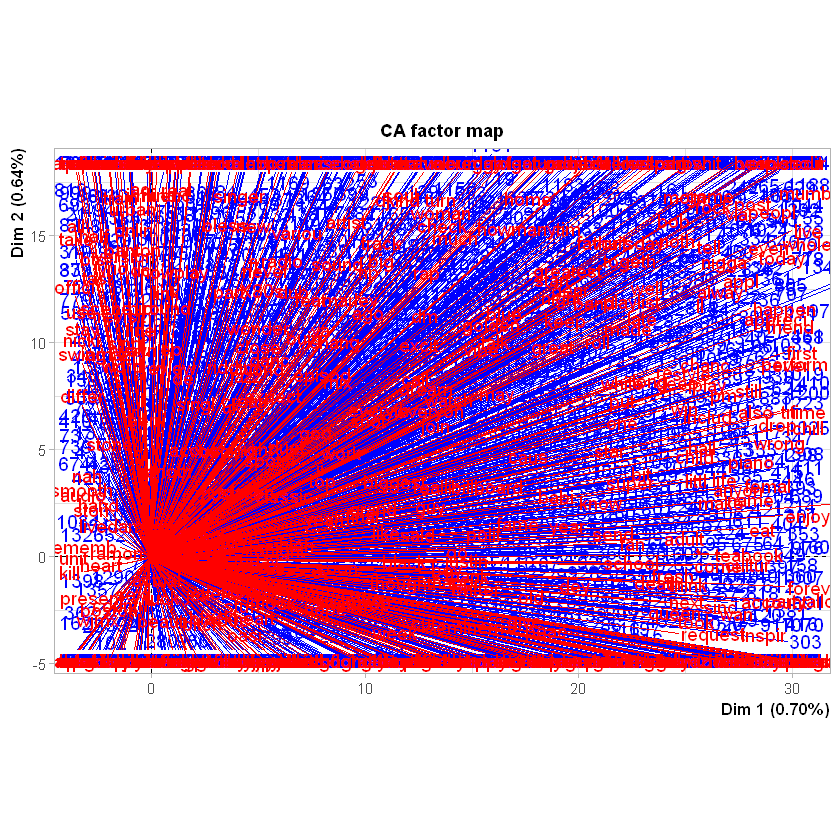

In [61]:
plot(music.afc, autoLab = "yes")
dev.print(device=png, file = "../../Data/auto_repartition.png",width=1000)

png 
  2

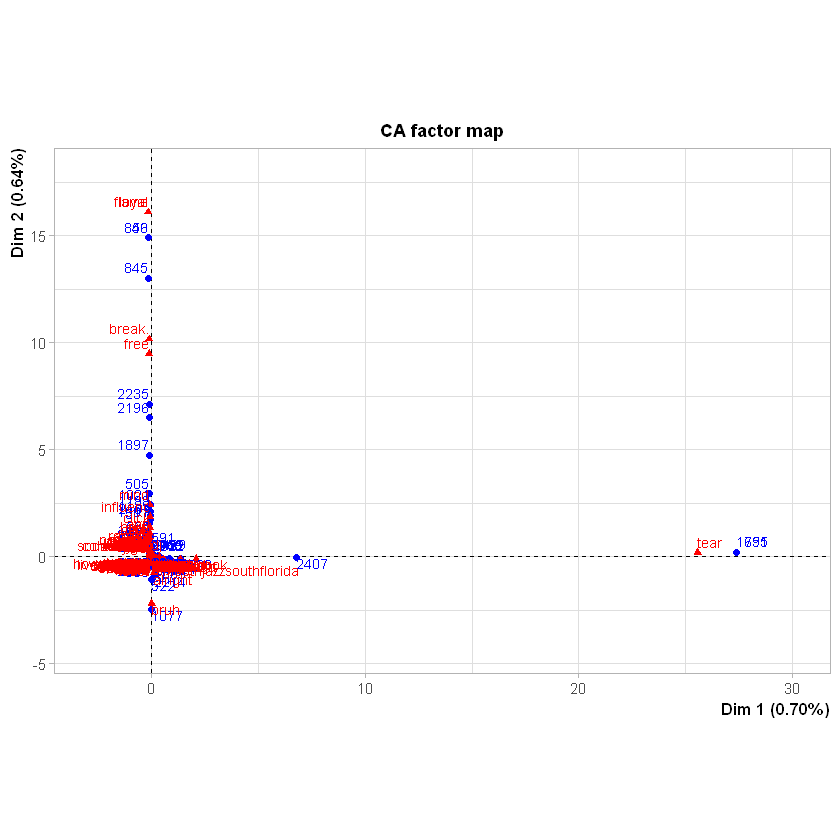

In [33]:
plot(music.afc,cex=0.75)
dev.print(device=png, file = "../../Data/repartition.png",width=600)

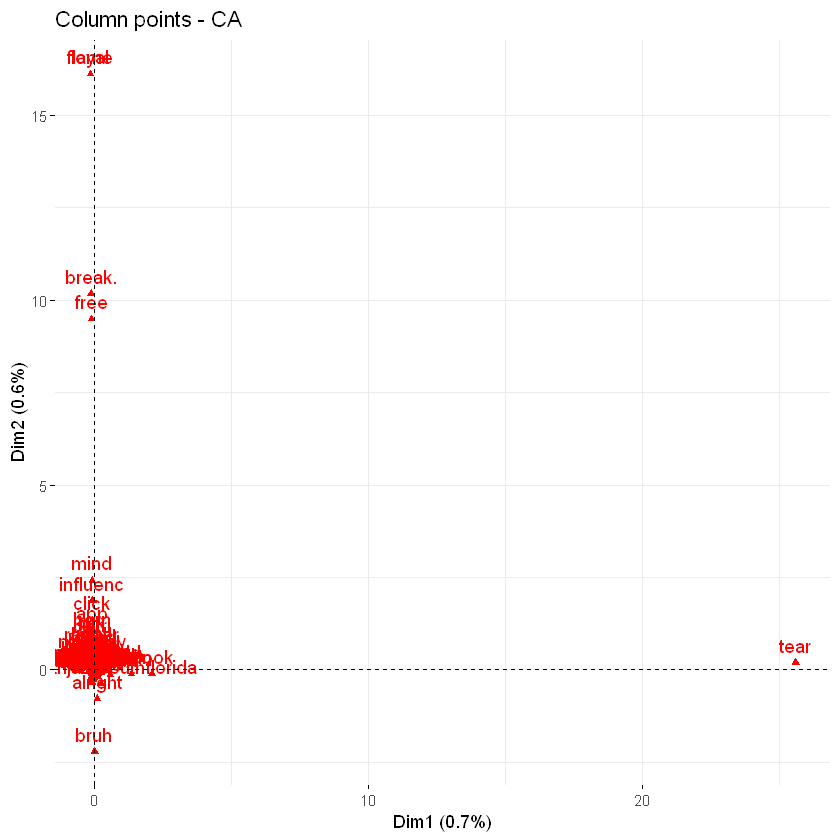

In [34]:
fviz_ca_col(music.afc)

In [35]:
#coordonnées, contributions et cos2 - colonnes
music.afc$col


$coord
                               Dim 1        Dim 2         Dim 3         Dim 4
rock                   -0.0488787919 -0.079378960 -5.455764e-02 -1.193514e-01
roll                   -0.0499391114 -0.093750524 -5.665415e-02 -1.250007e-01
rap                    -0.0469458866 -0.041985066  1.032417e-01 -4.832158e-02
regga                  -0.0427467353 -0.025164201 -5.105598e-02 -4.411070e-02
pop                    -0.0360373213 -0.129882919 -3.356950e-02  2.700463e-02
jazz                   -0.0427762171  0.023273578 -5.180544e-02 -9.860733e-02
music                  -0.0300324746 -0.030005799 -4.080668e-02 -7.576283e-02
song                   -0.0479406205 -0.064730628 -1.439633e-02 -6.043423e-02
like                   -0.0478620943 -0.110314879 -4.190934e-02  4.699327e-02
nowplay                -0.0553085069  0.328016724 -4.623375e-02 -1.003747e-01
love                    0.1031938974 -0.144642527  4.183157e-01 -7.166315e-02
listen                 -0.0531758768 -0.013607882 -5.209685e-02 -1.022463e-01
new                    -0.0414629649  0.104695817 -3.043031e-02 -2.208444e-02
via                    -0.0478787780 -0.084874264 -6.602064e-02 -1.306501e-01
one                    -0.0380594586 -0.099230181 -5.712393e-02 -7.155976e-04
smoke                  -0.0447034701 -0.158435898  1.831327e-02  9.994296e-02
play                   -0.0473426315 -0.100565225 -6.614189e-02 -1.307435e-01
go                     -0.0496112612 -0.113882466 -4.105244e-02 -5.090229e-02
make                   -0.0503934794 -0.111197372 -5.275344e-02 -1.918755e-02
get                    -0.0498115706  0.004031029 -3.715323e-02  3.533469e-02
day                    -0.0484369690 -0.032567396 -5.687129e-02  8.991774e-02
radio                  -0.0519331308  0.019432530 -6.579152e-02 -8.657598e-02
album                  -0.0466176305 -0.028086025 -3.506687e-02 -3.307108e-02
got                    -0.0460286972 -0.040426519 -6.814317e-02  6.848675e-02
know                    0.2649509370 -0.070231958 -3.846232e-02 -3.966570e-02
best                   -0.0498713801 -0.075933748 -5.190921e-02 -5.694737e-02
good                   -0.0322261085 -0.031002481 -5.124388e-02 -3.744613e-02
let                    -0.0399989606 -0.131399470 -4.794757e-02 -6.811230e-02
want                   -0.0256166895 -0.138001775  9.710840e-03  2.632451e-02
live                    0.0331122527 -0.051151421 -4.882446e-02 -9.271064e-03
world                  -0.0238367248  0.041165496 -7.734197e-02 -9.505890e-02
man                    -0.0468514470 -0.131101821 -6.251981e-02  1.686558e-02
say                    -0.0538470298 -0.144337271 -3.384016e-02  6.225655e-03
shit                   -0.0370242860 -0.061054808 -8.502927e-03 -3.025866e-02
time                   -0.0488288528 -0.105540541 -4.073854e-02 -4.296490e-02
onlin                  -0.0628134162  0.066372350 -7.603684e-02 -1.354166e-01
band                   -0.0480914852 -0.086360137 -6.144368e-02 -1.095932e-01
see                    -0.0387471961 -0.132622342 -3.985562e-02 -4.867158e-02
fuck                   -0.0423268588 -0.234094490  1.425726e+00 -4.614660e-03
realli                 -0.0414109784 -0.102221095 -1.288835e-02 -1.497523e-02
girl                    0.0278879756 -0.142089980  1.130319e-01 -5.943552e-02
hit                    -0.0417118335 -0.045332676 -5.553400e-02 -8.145580e-02
back                    0.0021794062 -0.138037750 -6.955242e-02  2.542061e-01
thank                  -0.0308423766 -0.116412411 -1.206932e-02 -3.288268e-02
god                    -0.0522517338 -0.069405955 -9.976127e-03 -1.252577e-01
urban                  -0.0632484051  0.102773763 -7.726739e-02 -1.404449e-01
look                   -0.0492640219 -0.139909280 -5.923654e-02 -2.840258e-02
thing                  -0.0377280739 -0.123059913 -1.101041e-02 -2.092373e-02
right                  -0.0399825577 -0.034183361 -2.397756e-02 -3.981286e-02
still                  -0.0476843372 -0.102674555 -5.983783e-02 -1.005459e-01
think          

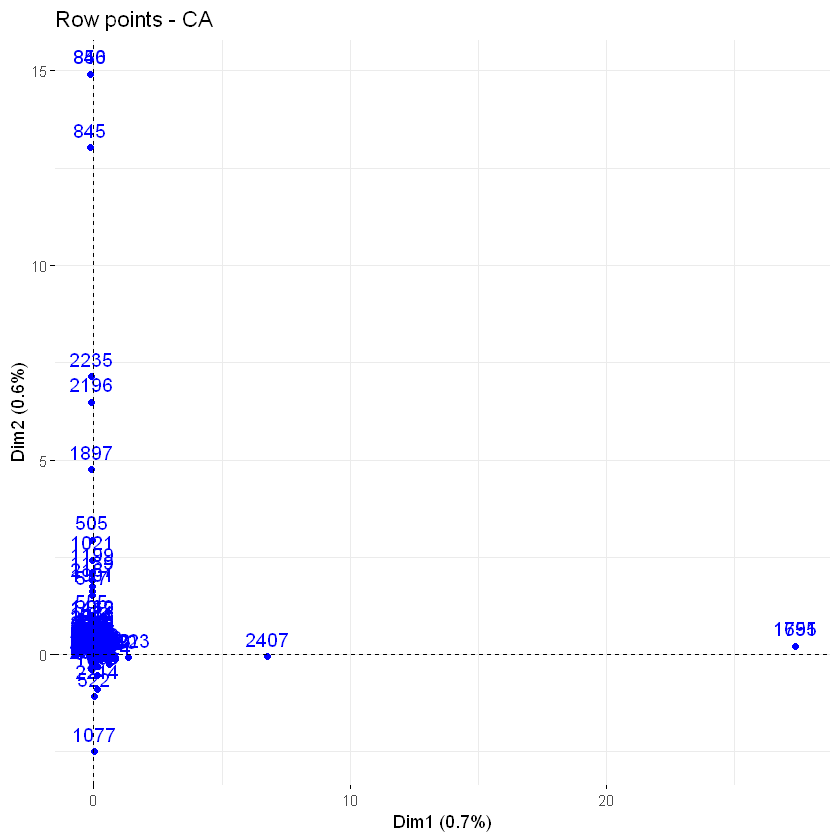

In [36]:
fviz_ca_row(music.afc)
#partition en 6 semble bien pour les clusters des tweets

In [37]:
#coordonnées, contributions et cos2 - lignes
music.afc$row

$coord
             Dim 1         Dim 2         Dim 3         Dim 4         Dim 5
0    -0.0676853578  0.7958839017 -0.0399435587 -0.1940032689 -1.096869e+00
1    -0.0327418521 -0.0265727760 -0.0497438170 -0.0355993700 -1.861683e-01
2    -0.0640896600 -0.1216351425 -0.0770946040 -0.1494821060 -6.127159e-01
3     0.0317969107 -0.0110473859 -0.0239976143  0.1045184049  1.163991e-01
10   -0.0523981679  0.1937042401 -0.0431441109 -0.0198088056 -1.908375e-01
11    0.0198031225 -0.1933253671  0.3321334816 -0.2994031124 -2.032631e+00
13   -0.0677455222 -0.1237447506 -0.1188013354 -0.2832233023 -1.633678e+00
14   -0.0481793985 -0.1221398499 -0.0547512149 -0.0419414274 -1.750116e-01
15   -0.0592676790 -0.1849614199  0.0586929257 -0.0615913127 -2.218961e-01
16   -0.0507558213 -0.1250222872 -0.0678709830 -0.1259951927 -3.272358e-01
19   -0.0542860133 -0.1083852177 -0.0612535105 -0.1055182766 -3.666835e-01
21   -0.0460879488 -0.1316046112 -0.0548043045 -0.0495062542 -1.194749e-01
22   -0.0529188455 -0.0976410527 -0.0630796346 -0.1411255901 -6.272787e-01
25   -0.0595140237 -0.1137502474 -0.0830453639 -0.1399803492 -7.358537e-01
27   -0.0479089975 -0.1308119026 -0.0506556926 -0.0067736495  1.747897e-02
28   -0.0548455076 -0.0713653700 -0.0516064950 -0.1101048326 -2.521188e-01
30   -0.0280092714 -0.0797232821 -0.0687823144 -0.0967064829 -1.079942e-01
31   -0.0592173659 -0.0718701232 -0.0828610559 -0.1041603233 -4.715987e-01
32   -0.0256613172 -0.0932368610 -0.0782252004 -0.0836396506 -2.559081e-01
33   -0.0403562363 -0.0810314791 -0.0430363250 -0.1299271173 -4.055801e-01
34   -0.0592173659 -0.0718701232 -0.0828610559 -0.1041603233 -4.715987e-01
36   -0.0581462038 -0.1005327514 -0.0722443705 -0.1094263104 -5.305727e-01
38   -0.0512184571 -0.0711854442 -0.0459958606 -0.0647755236 -1.041983e-01
39   -0.0595140237 -0.1137502474 -0.0830453639 -0.1399803492 -7.358537e-01
41   -0.0343368528 -0.0924705959 -0.0750558752 -0.0828784759 -3.461019e-01
43   -0.0515323294 -0.1229034844 -0.0670281238 -0.0600696441 -2.998507e-01
44   -0.0433789389 -0.1210659948 -0.0520280014  0.1747708921 -2.388585e-01
45   -0.0674138667 -0.1078709613 -0.1129931546 -0.2460629390 -1.270582e+00
46    0.0155447463 -0.1256068015  0.3148392342 -0.2882166645 -1.913690e+00
47   -0.0510122774 -0.0807302057 -0.0705497667 -0.1297452489 -1.113586e-01
48   -0.0505974371 -0.0607293348 -0.0466034557 -0.0758877299 -1.208605e-01
49   -0.0543746035 -0.0528828313 -0.0824044284 -0.1312841215 -5.248610e-01
50   -0.0476951910 -0.0670673596 -0.0445243510 -0.0919266517 -2.417874e-01
51   -0.0449472455 -0.0746692359 -0.0609154265 -0.0880333118 -2.168045e-01
52   -0.0510234906 -0.0757388150 -0.0489380021 -0.0626523268 -1.127185e-01
53   -0.0554574995 -0.1222569385 -0.0590448443 -0.1321540634 -4.036057e-01
55   -0.0523612334 -0.0902728126  0.2448851084 -0.0534474255 -1.611978e-01
56   -0.0503421073 -0.0733948212 -0.0387509824 -0.0525801116 -5.629490e-02
58   -0.0462321451 -0.1203027139 -0.0569675342 -0.0363608368 -2.772143e-02
59   -0.0578824004 -0.1020573671 -0.0590937488 -0.0962673206 -4.268956e-01
60   -0.0577519961 -0.0631820076 -0.0784481953 -0.1051804581 -4.527317e-01
61   -0.0583928461 -0.0915730699 -0.0649569005 -0.0587682651 -3.516026e-01
62    0.0198031225 -0.1933253671  0.3321334816 -0.2994031124 -2.032631e+00
63   -0.0403594966 -0.0532452083 -0.0744383185  0.3570446656 -1.352675e-01
64    0.5327676193 -0.1037291781 -0.0377605749 -0.0636737349 -6.388978e-03
65   -0.0529188455 -0.0976410527 -0.0630796346 -0.1411255901 -6.272787e-01
66   -0.0511244686 -0.0871778372 -0.0692532681 -0.0622213470 -2.504165e-01
69   -0.0535655072 -0.0508029243 -0.0443447735 -0.0976106869 -6.243743e-02
71   -0.0529188455 -0.0976410527 -0.0630796346 -0.1411255901 -6.272787e-01
73   -0.0363946769 -0.1198537717 -0.0098784076 -0.0533569827 -2.315399e-01
74   -0.0011278631 -0.1337062709 -0.0443827955 -0.0385351776 -7.390397e-02
76   -0.0565475227  0.2033714549 -0.0504518793 -0.1478514731 -5.712967e-01
77   -0.0525909031

# CAH

In [90]:
music=read.csv2("../../Data/music_dataframe_TFIDF.csv",sep=',',header=T)
music = as.data.frame(music)

index = music$id
music=music[-1]

music.numeric <- data.frame(sapply(music, function(x) as.numeric(as.character(x))))
music.numeric = as.data.frame(music.numeric)
rownames(music.numeric) = index

In [91]:
music=t(music.numeric)
#cl <- kmeans(x, 1000, iter.max=20)
#cah <- HCPC(cl$centers, graph=FALSE, nb.clust=-1)
#plot.HCPC(cah, choice="tree")

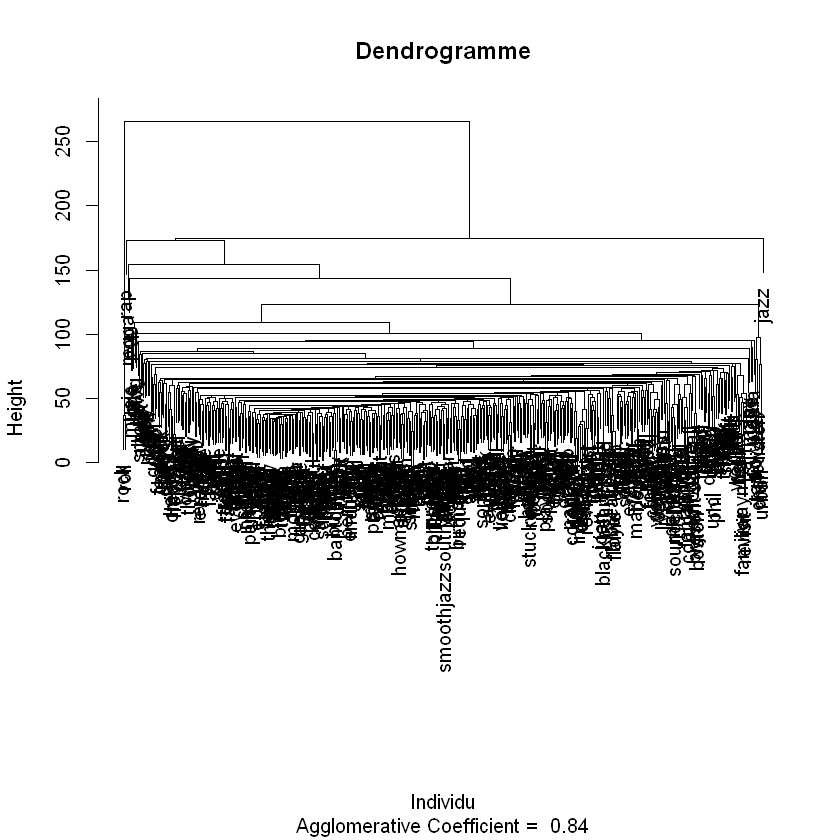

In [92]:
classif <- agnes(scale(music, center = TRUE, scale = TRUE),metric = "euclidean",method="ward")
plot(classif,xlab="Individu",which.plot=2,main="Dendrogramme")

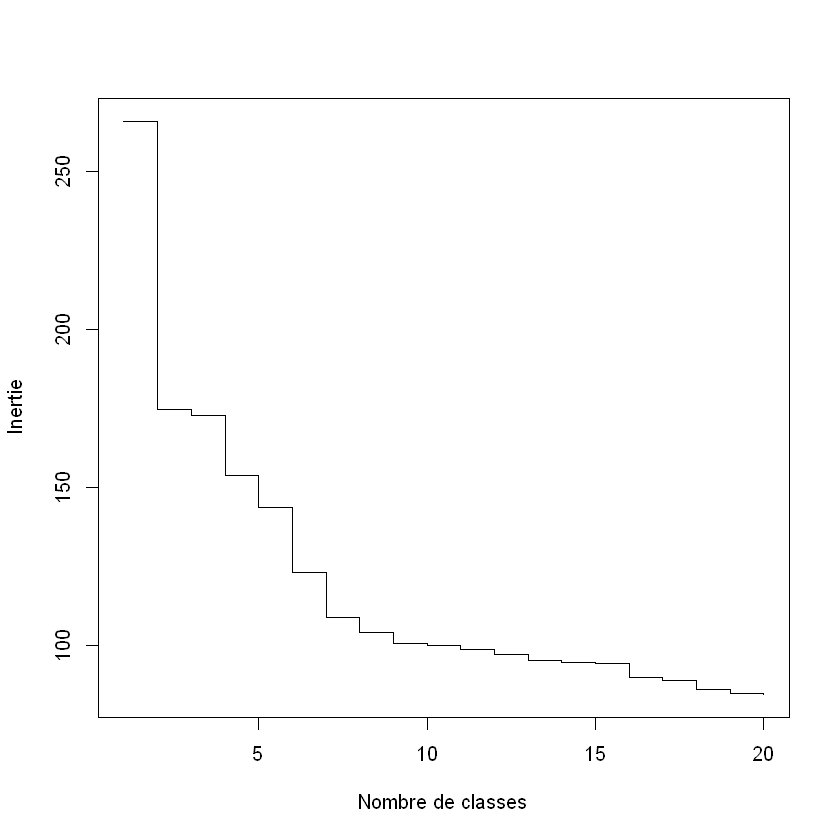

In [93]:
inertie <- sort(classif$height, decreasing = TRUE)
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")

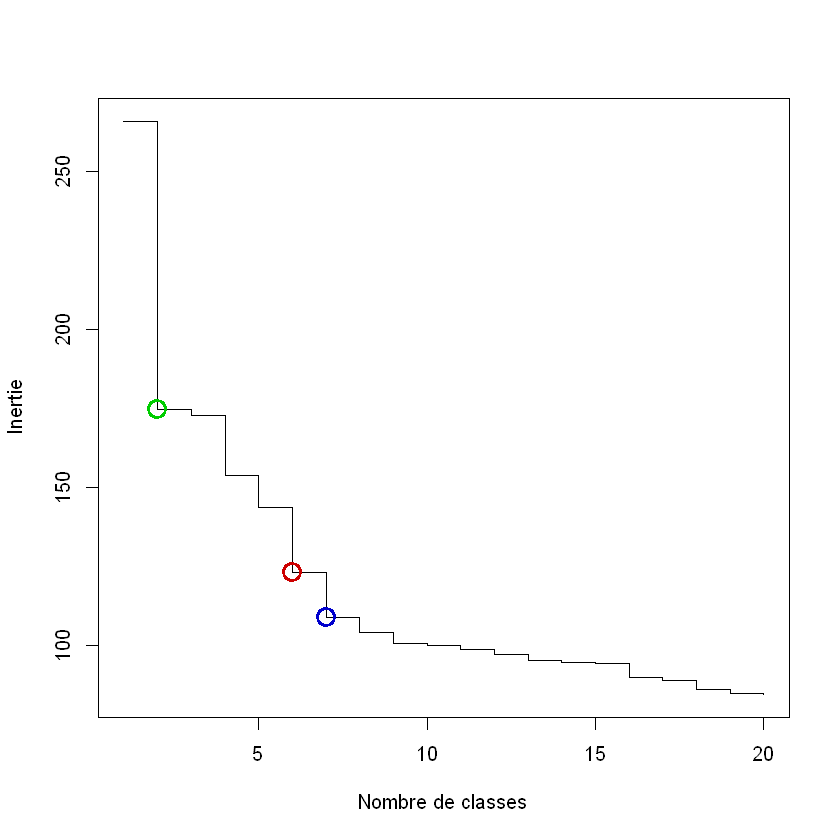

In [94]:
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")
points(c(2, 6, 7), inertie[c(2, 6, 7)], col = c("green3", "red3", 
  "blue3"), cex = 2, lwd = 3)

Warning message in plot.window(xlim, ylim, log = log, ...):
""hang" n'est pas un paramètre graphique"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""hang" n'est pas un paramètre graphique"


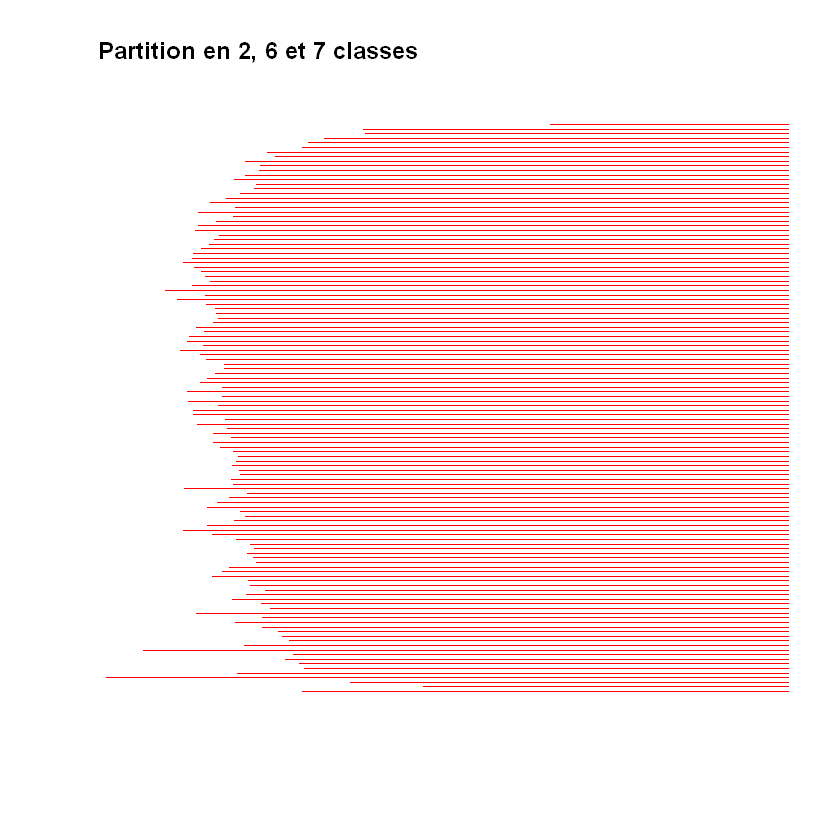

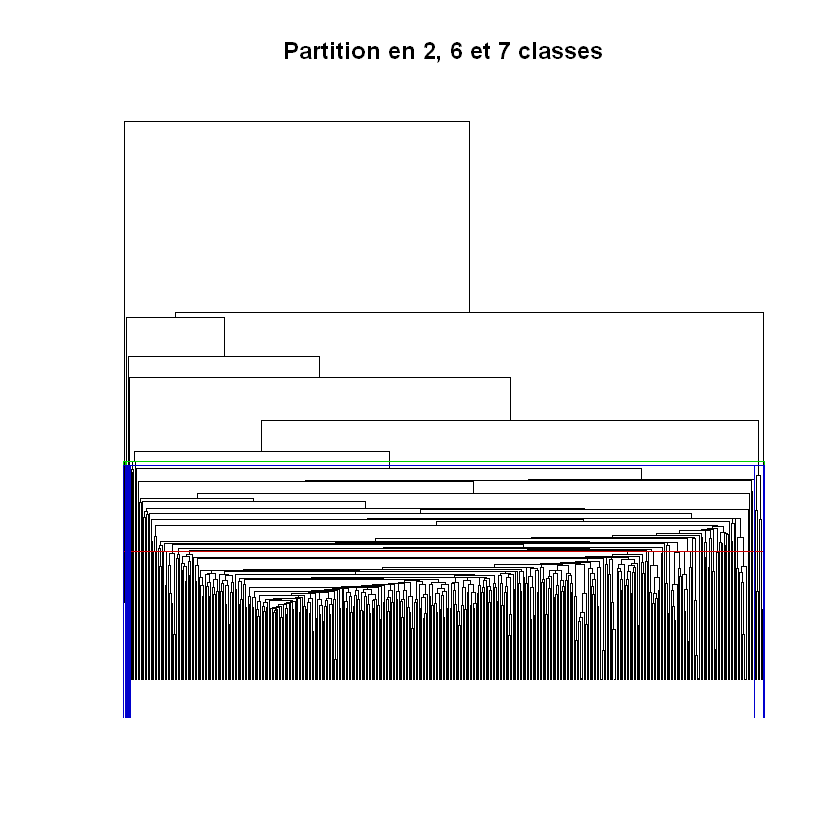

In [95]:
plot(classif, labels = FALSE, main = "Partition en 2, 6 et 7 classes", 
  xlab = "", ylab = "", sub = "", axes = FALSE, hang = -1)
rect.hclust(classif, 2, border = "green3")
rect.hclust(classif, 6, border = "red3")
rect.hclust(classif, 7, border = "blue3")


In [96]:
best.cutree(classif)

[1] 3

[1] 3

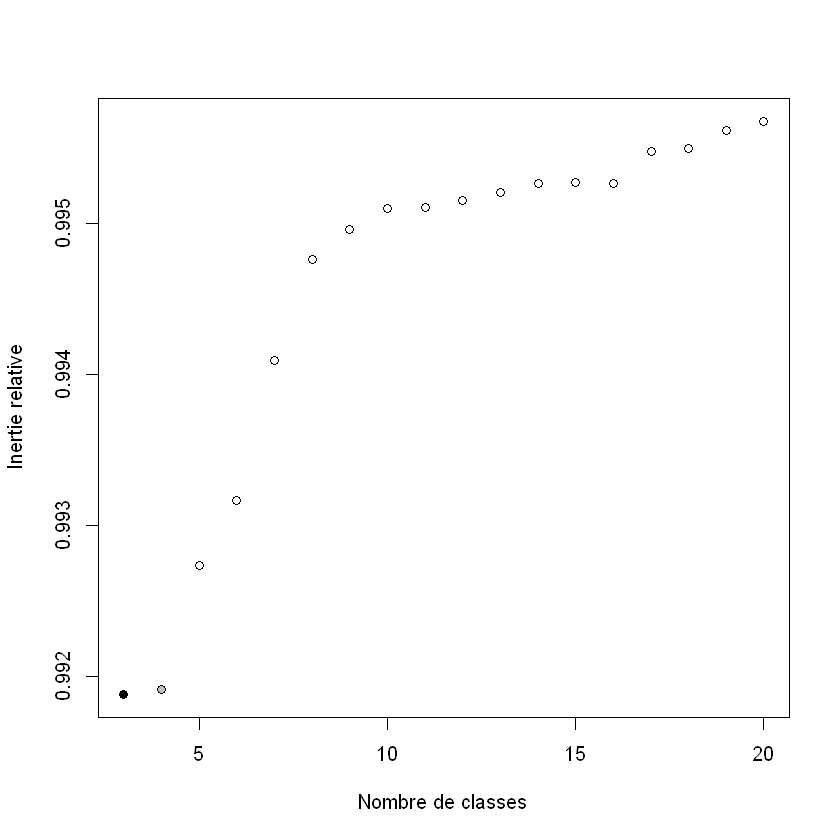

In [97]:
best.cutree(classif, graph = TRUE, xlab = "Nombre de classes", 
  ylab = "Inertie relative")

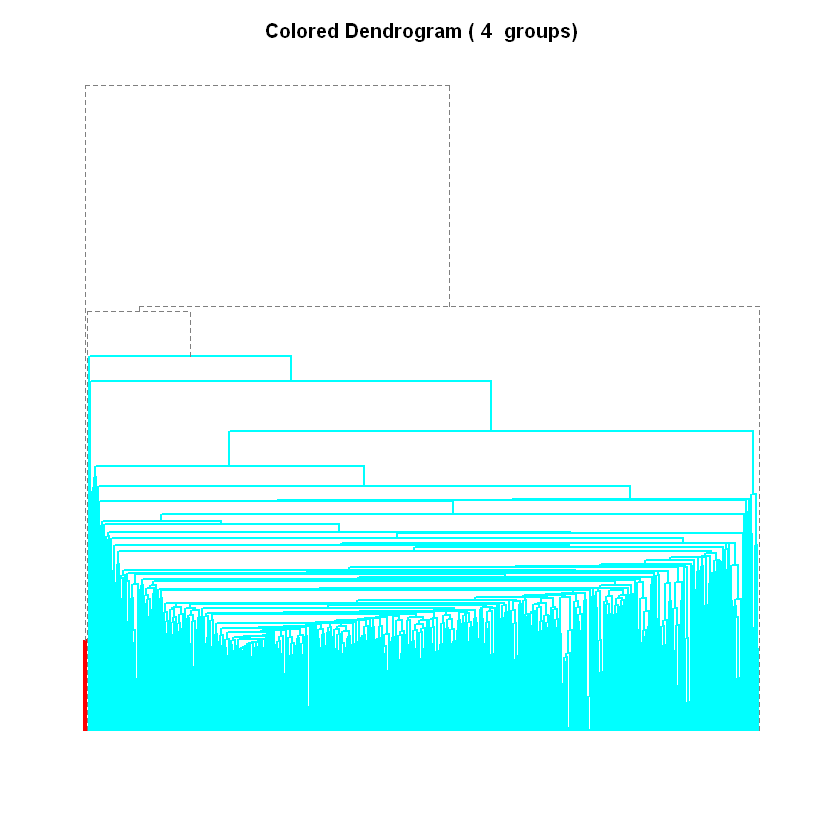

In [81]:
A2Rplot(classif, k = 3, boxes = FALSE, col.up = "gray50", show.labels = FALSE)

## CAH avec l'ACP 

In [8]:
classe <- cutree(classif, k = 4)

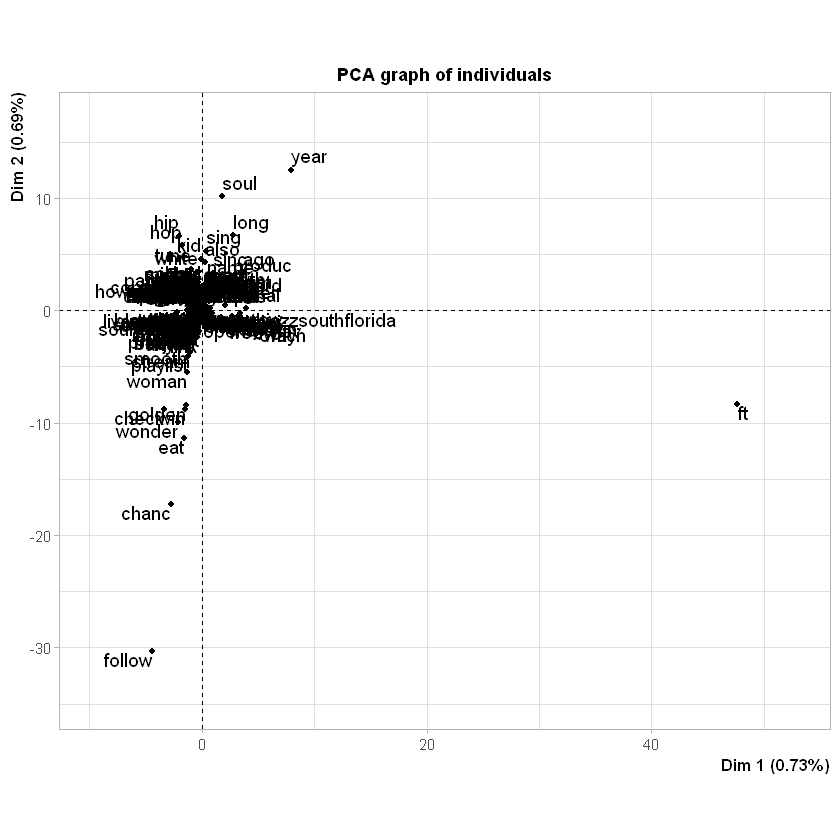

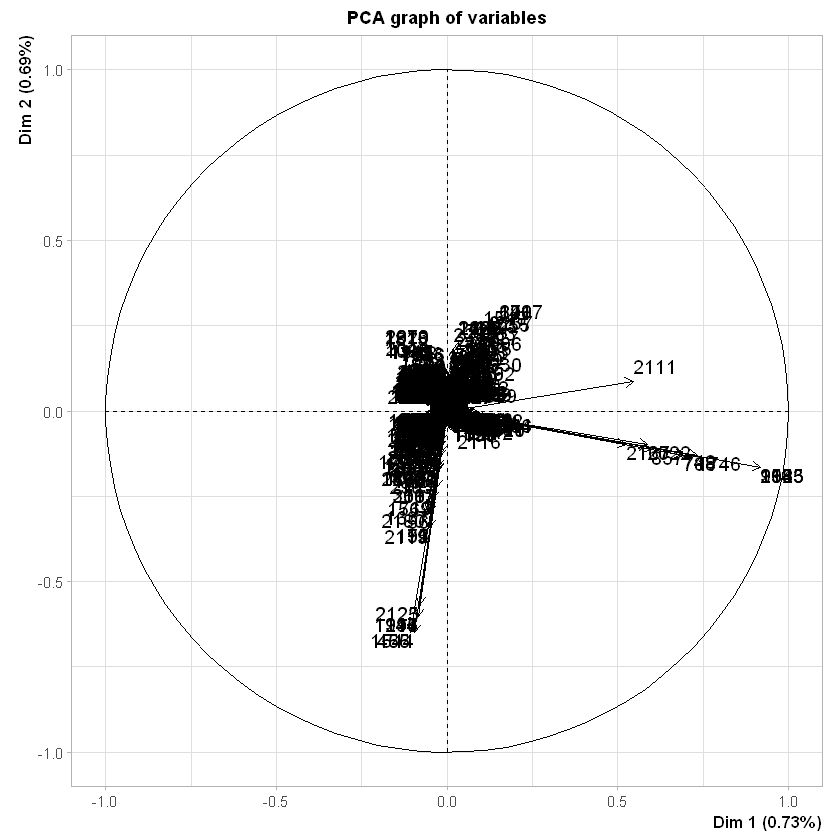

In [12]:
res.pca<-PCA(t(music.numeric),ncp=3,graph=T)

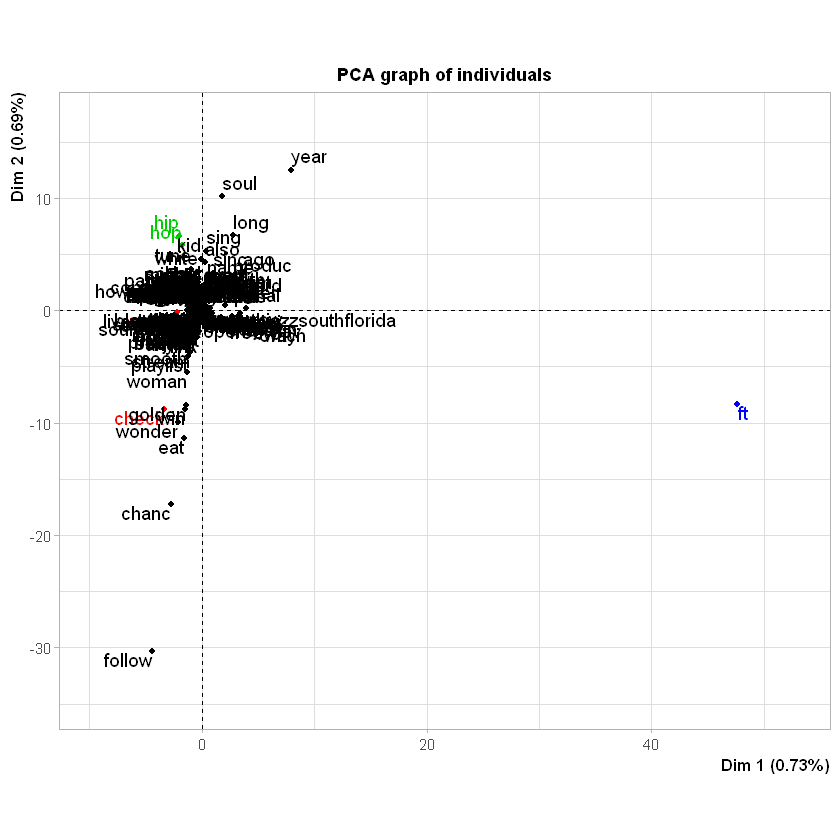

In [13]:
plot(res.pca,choix="ind", habillage="ind",col.hab=classe)


In [14]:
res.hcpc<-HCPC(res.pca,consol=F,nb.clust=4)

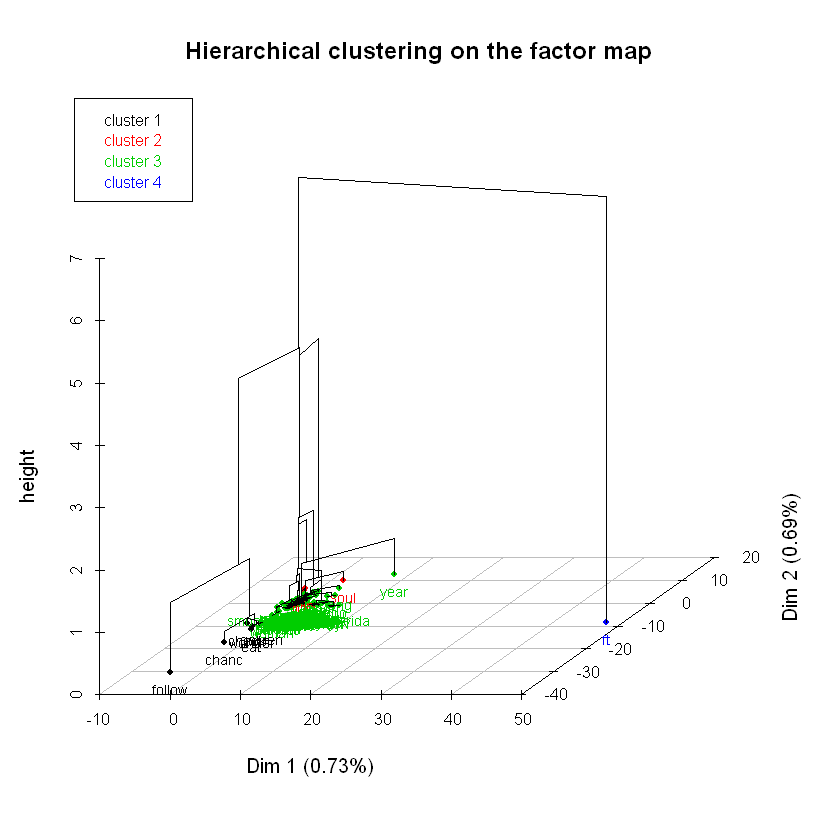

In [15]:
plot(res.hcpc)

# Kmeans

In [98]:
music=read.csv2("../../Data/music_dataframe_TFIDF.csv",sep=',',header=T)
music = as.data.frame(music)

index = music$id
music=music[-1]

music.numeric <- data.frame(sapply(music, function(x) as.numeric(as.character(x))))
music.numeric = as.data.frame(music.numeric)
rownames(music.numeric) = index
music=t(music.numeric)